In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np


%matplotlib widget

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==3: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)

SMALL_SIZE  = 10
MEDIUM_SIZE = 12

# title
plt.rc('axes',titlesize=MEDIUM_SIZE,titleweight='bold')
# xy-labels
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
    
px2inch = 1/plt.rcParams['figure.dpi']

In [5]:
def norm(v):
    a = np.min(v)
    b = np.max(v)
    return (v-a)/(b-a)

def get_random(x_lims=[0,1],y_lims=[0,1],n=100,cmap='Reds',k=0.1):
    
    x_lims = np.array( x_lims ) + k*np.diff( x_lims )*np.array([1,-1])
    y_lims = np.array( y_lims ) + k*np.diff( y_lims )*np.array([1,-1])
    x = x_lims[0] + (x_lims[1]-x_lims[0])*np.random.rand(1,n)
    y = y_lims[0] + (y_lims[1]-y_lims[0])*np.random.rand(1,n)
    c = np.sqrt(x**2+y**2)
    return {'mat':np.vstack((x,y)),'color':norm(c),'cmap':cmap}

def sigmoid(z): 
    return 1/(1+np.exp(-z))

def tanh(z): 
    return 2*sigmoid(2*z)-1


def  rotX(t):
     t*=np.pi/180
     return np.array([[np.cos(t),-np.sin(t)],
                      [np.sin(t),+np.cos(t)]])

def shear(x=0,y=0):
    
    return np.array([[1,x],
                     [y,1]])


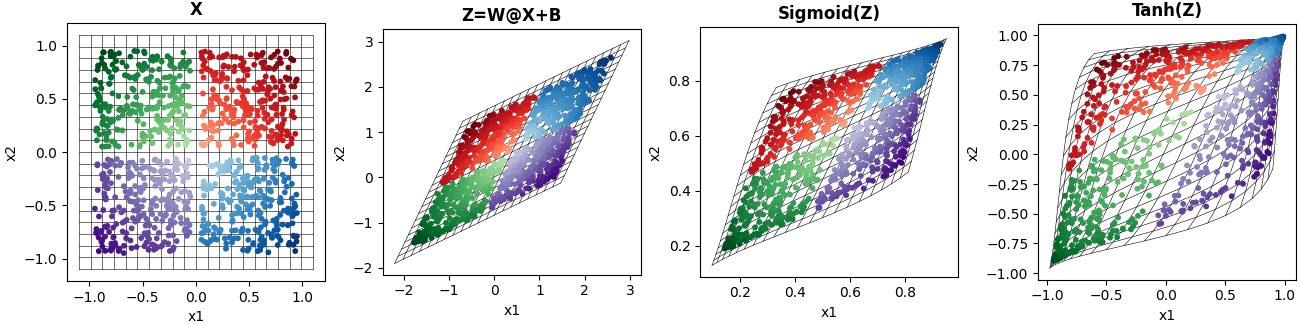

In [6]:
n = 250
k = 0.05
a = get_random(x_lims=[0,1 ],y_lims=[0,1 ],k=k,n=n,cmap='Reds')
b = get_random(x_lims=[0,1 ],y_lims=[0,-1],k=k,n=n,cmap='Blues')
c = get_random(x_lims=[-1,0],y_lims=[0,1 ],k=k,n=n,cmap='Greens')
d = get_random(x_lims=[-1,0],y_lims=[-1,0],k=k,n=n,cmap='Purples')

size_plot = 325
fig, ax   = plt.subplots(1,4,constrained_layout=True,figsize=(4*size_plot*px2inch,size_plot*px2inch))

# LT = rotX(45)
# B  = 0
LT = np.random.randn(2,2)
B  = np.random.randn(2,1)

for P in [a,b,c,d]:
    
    P0 = P['mat']
    P1 = LT@P0 + B
    P2 = sigmoid(P1)
    P3 = tanh(P1)
    cmin = -0.5
    s    = 10
    lw   = 0.4
    ax[0].scatter(P0[0,:],P0[1,:],s=s,c=P['color'],cmap=P['cmap'],vmin=cmin);
    ax[1].scatter(P1[0,:],P1[1,:],s=s,c=P['color'],cmap=P['cmap'],vmin=cmin);
    ax[2].scatter(P2[0,:],P2[1,:],s=s,c=P['color'],cmap=P['cmap'],vmin=cmin);
    ax[3].scatter(P3[0,:],P3[1,:],s=s,c=P['color'],cmap=P['cmap'],vmin=cmin);

n   = 21
xy  = np.linspace(-1.1,1.1,n)
X,Y = np.meshgrid(xy,xy)

xc  = X.flatten()
yc  = Y.flatten()

Xc  = LT @ np.vstack((xc,yc)) + B
Yc  = LT @ np.vstack((yc,xc)) + B

Xgrid_x = Xc[0,:].reshape(n,n)
Xgrid_y = Xc[1,:].reshape(n,n)

Ygrid_x = Yc[0,:].reshape(n,n)
Ygrid_y = Yc[1,:].reshape(n,n)

ax[0].plot(X,Y,'k',lw=lw,zorder=0)
ax[0].plot(Y,X,'k',lw=lw,zorder=0)

ax[1].plot( Xgrid_x,Xgrid_y,'k',lw=lw,zorder=0);
ax[1].plot( Ygrid_x,Ygrid_y,'k',lw=lw,zorder=0);

ax[2].plot( sigmoid(Xgrid_x), sigmoid(Xgrid_y) ,'k',lw=lw,zorder=0);
ax[2].plot( sigmoid(Ygrid_x), sigmoid(Ygrid_y) ,'k',lw=lw,zorder=0);

ax[3].plot( tanh(Xgrid_x), tanh(Xgrid_y) ,'k',lw=lw,zorder=0);
ax[3].plot( tanh(Ygrid_x), tanh(Ygrid_y) ,'k',lw=lw,zorder=0);

plot_sets(ax[0],xla='x1',yla='x2',gr=False,ar=1,ti='X')
plot_sets(ax[1],xla='x1',yla='x2',gr=False,ar=1,ti='Z=W@X+B')
plot_sets(ax[2],xla='x1',yla='x2',gr=False,ar=1,ti='Sigmoid(Z)')
plot_sets(ax[3],xla='x1',yla='x2',gr=False,ar=1,ti='Tanh(Z)')

plt.show()